In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
from sklearn.metrics import silhouette_score, adjusted_rand_score


In [32]:
df=pd.read_csv("C:/Users/varsh/Downloads/wine-clustering-extended.csv")

In [3]:
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [4]:
df.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1005 entries, 0 to 1004
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               1005 non-null   float64
 1   Malic_Acid            1005 non-null   float64
 2   Ash                   1005 non-null   float64
 3   Ash_Alcanity          1005 non-null   float64
 4   Magnesium             1005 non-null   float64
 5   Total_Phenols         1005 non-null   float64
 6   Flavanoids            1005 non-null   float64
 7   Nonflavanoid_Phenols  1005 non-null   float64
 8   Proanthocyanins       1005 non-null   float64
 9   Color_Intensity       1005 non-null   float64
 10  Hue                   1005 non-null   float64
 11  OD280                 1005 non-null   float64
 12  Proline               1005 non-null   float64
dtypes: float64(13)
memory usage: 102.2 KB


In [7]:
df.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline'],
      dtype='object')

In [8]:
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


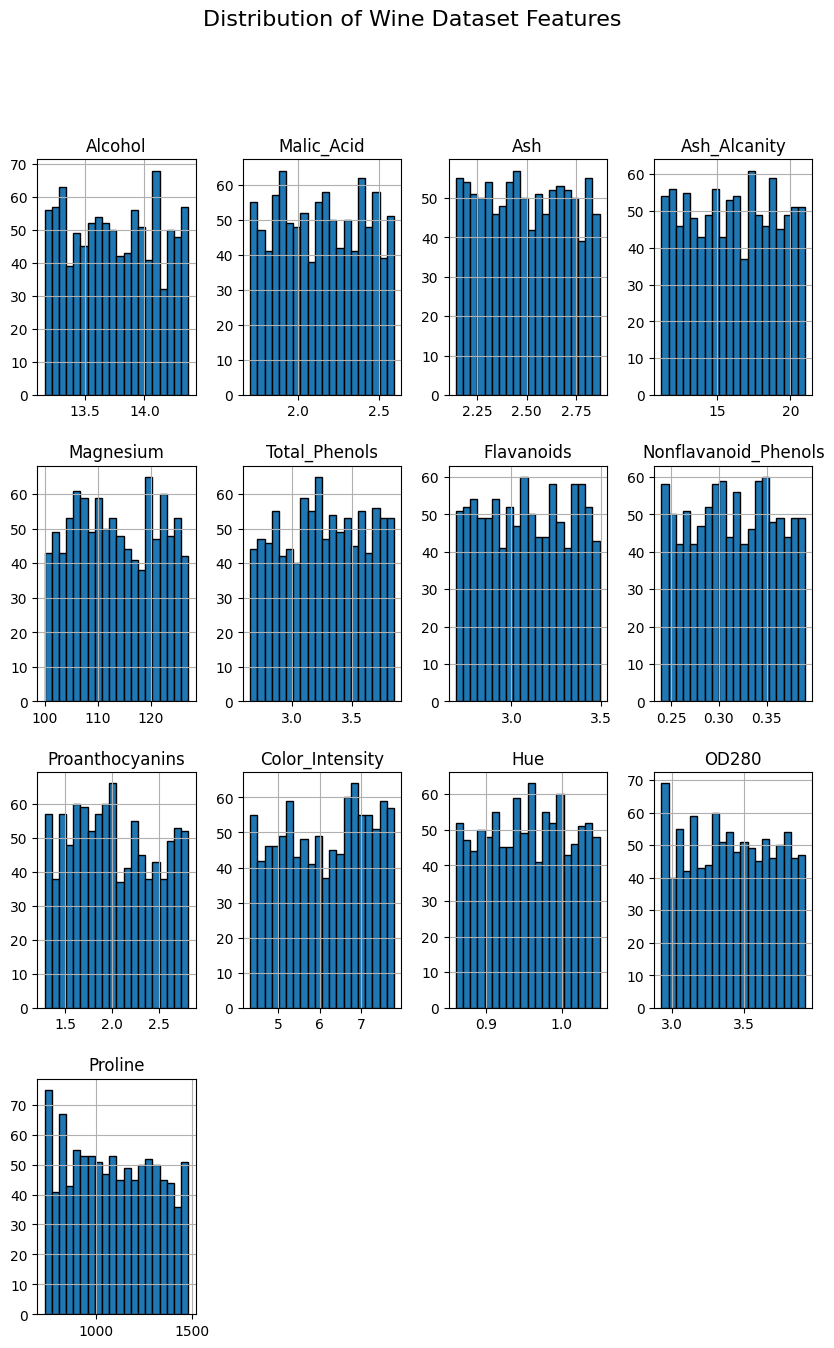

In [9]:
df.hist(figsize=(10,15),bins=20,edgecolor='black')
plt.suptitle("Distribution of Wine Dataset Features", fontsize=16)
plt.show()

In [10]:
df.skew()

Alcohol                 0.017577
Malic_Acid              0.011659
Ash                     0.027824
Ash_Alcanity           -0.005676
Magnesium               0.035757
Total_Phenols          -0.041134
Flavanoids             -0.004234
Nonflavanoid_Phenols   -0.011974
Proanthocyanins         0.124943
Color_Intensity        -0.090793
Hue                    -0.023372
OD280                   0.005361
Proline                 0.076227
dtype: float64

In [11]:
from sklearn.preprocessing import PowerTransformer

features = ['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
            'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
            'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline']


pt = PowerTransformer(method='yeo-johnson')
df_normal = df.copy()
df_normal[features] = pt.fit_transform(df[features])


In [12]:
df_normal.skew()

Alcohol                -0.002769
Malic_Acid             -0.021408
Ash                    -0.011205
Ash_Alcanity           -0.053020
Magnesium              -0.011267
Total_Phenols          -0.033692
Flavanoids             -0.018289
Nonflavanoid_Phenols   -0.012465
Proanthocyanins        -0.014082
Color_Intensity        -0.069266
Hue                    -0.013737
OD280                  -0.018178
Proline                -0.041814
dtype: float64

In [13]:

df['Color_Score'] = df['Color_Intensity'] * df['Hue']


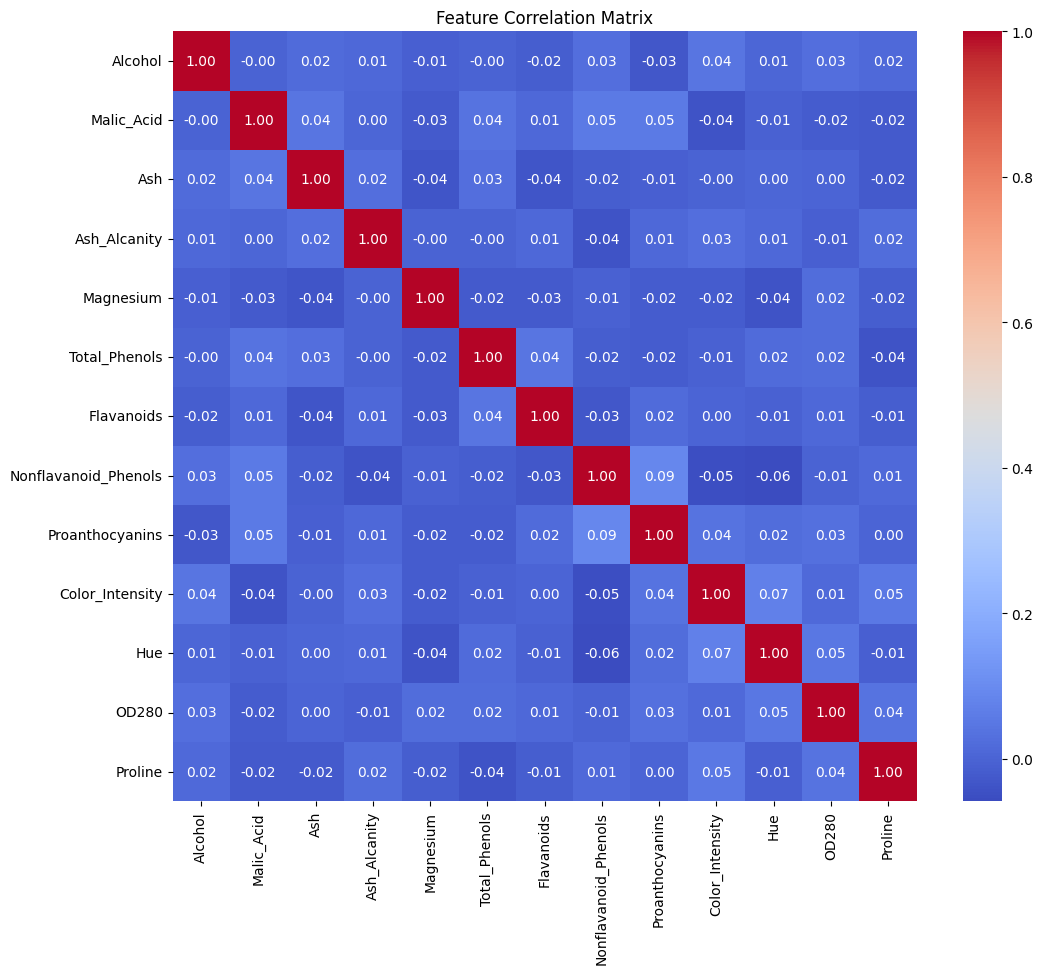

In [14]:
import seaborn as sns
corr = df[features].corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation Matrix")
plt.show()

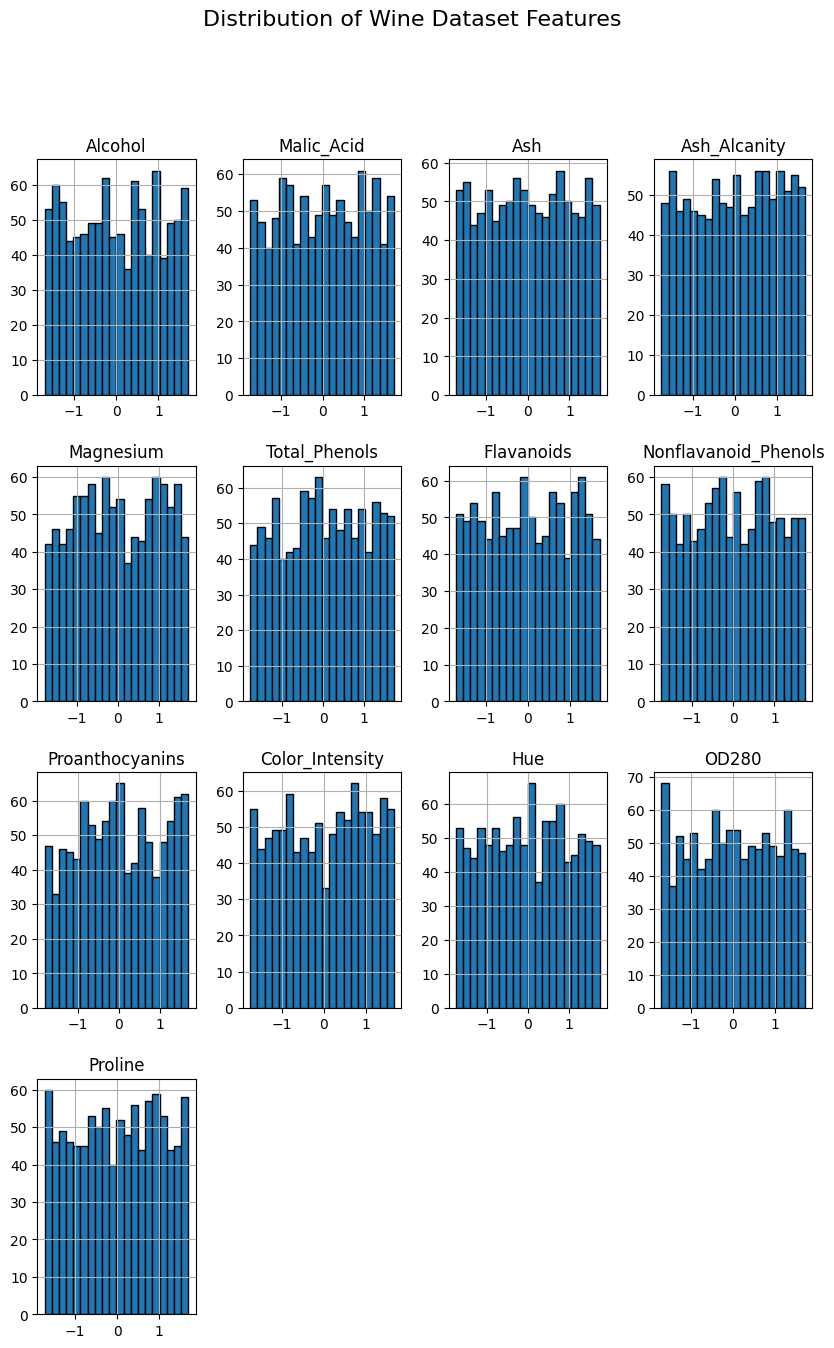

In [15]:
df_normal.hist(figsize=(10,15),bins=20,edgecolor='black')
plt.suptitle("Distribution of Wine Dataset Features", fontsize=16)
plt.show()

In [16]:
outlier_counts = {}
for col in df_normal.columns:
    if df_normal[col].dtype != "object": 
        Q1 = df_normal[col].quantile(0.25)
        Q3 = df_normal[col].quantile(0.75)
        IQR = Q3 - Q1

        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR

        outliers = df_normal[(df_normal[col] < lower) | (df_normal[col] > upper)]

        outlier_counts[col] = outliers.shape[0]



print("\nSummary of Outliers per Feature:")
print(pd.Series(outlier_counts))


Summary of Outliers per Feature:
Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64


In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_normal)
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X_scaled)

In [18]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

kmeans = KMeans(n_clusters=4, random_state=42)
labels_kmeans = kmeans.fit_predict(X_pca)

sil_score = silhouette_score(X_pca, labels_kmeans)
dbi = davies_bouldin_score(X_pca, labels_kmeans)
chi = calinski_harabasz_score(X_pca, labels_kmeans)

print("KMeans Results (k=4):")
print("Silhouette Score:", sil_score)
print("Davies-Bouldin Index:", dbi)
print("Calinski-Harabasz Index:", chi)

KMeans Results (k=4):
Silhouette Score: 0.13407381859158982
Davies-Bouldin Index: 1.8166373983120219
Calinski-Harabasz Index: 144.08431490735103


 Best K for KMeans: 10, Silhouette Score: 0.1628


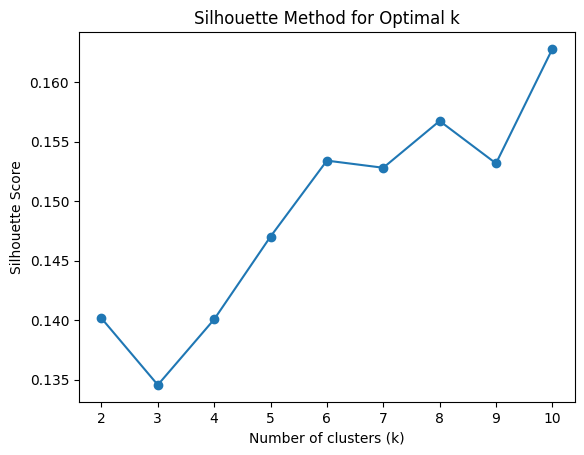

In [19]:
sil_scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=20)
    kmeans.fit(X_pca)
    sil_scores.append(silhouette_score(X_pca, kmeans.labels_))

optimal_k = K_range[np.argmax(sil_scores)]
print(f" Best K for KMeans: {optimal_k}, Silhouette Score: {max(sil_scores):.4f}")

plt.plot(K_range, sil_scores, marker='o')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Method for Optimal k")
plt.show()



KMeans Silhouette Score: 0.13456222940394696


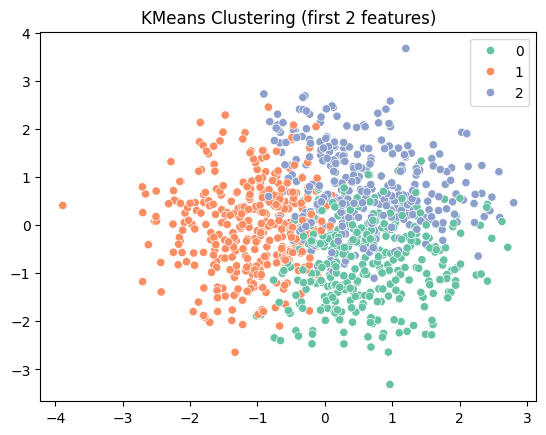

In [20]:
import seaborn as sns
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
labels_kmeans = kmeans.fit_predict(X_pca)

sil_kmeans = silhouette_score(X_pca, labels_kmeans)
print("KMeans Silhouette Score:", sil_kmeans)
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=labels_kmeans, palette="Set2")
plt.title("KMeans Clustering (first 2 features)")
plt.show()

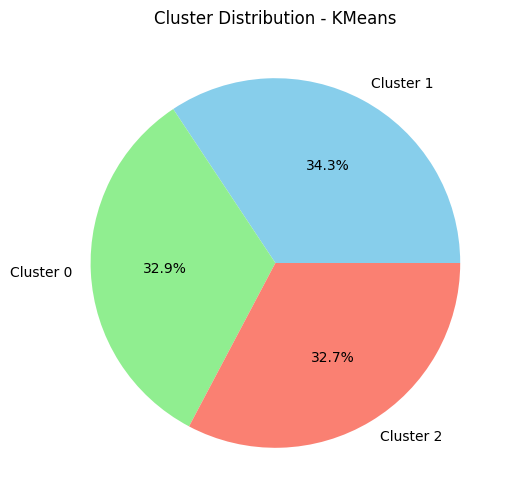

In [34]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42, n_init=20)
labels = kmeans.fit_predict(df[features])

cluster_counts = pd.Series(labels).value_counts()
plt.figure(figsize=(6,6))
plt.pie(cluster_counts, labels=[f"Cluster {i}" for i in cluster_counts.index],
        autopct="%1.1f%%", colors=["skyblue","lightgreen","salmon"])
plt.title("Cluster Distribution - KMeans")
plt.show()


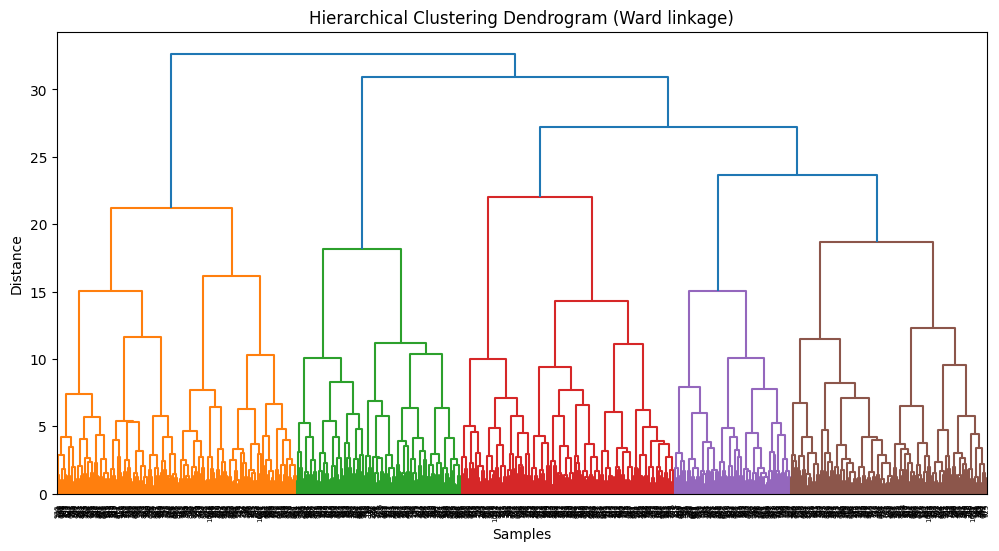

In [35]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(12, 6))
dend = sch.dendrogram(sch.linkage(X_pca, method='ward'))
plt.title("Hierarchical Clustering Dendrogram (Ward linkage)")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()

In [23]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.decomposition import PCA

In [24]:
best_score, best_params = -1, None
for linkage in ["ward", "average", "complete"]:
    for k in range(3, 8):
        agg = AgglomerativeClustering(n_clusters=k, linkage=linkage)
        labels = agg.fit_predict(X_pca)
        score = silhouette_score(X_pca, labels)
        if score > best_score:
            best_score, best_params = score, (linkage, k)

print(f"Best Silhouette Score: {best_score:.3f} with params: {best_params}")


Best Silhouette Score: 0.134 with params: ('average', 3)


Hierarchical Clustering Results (n_clusters=3):
Silhouette Score       : 0.048
Davies-Bouldin Index   : 2.166 (lower is better)
Calinski-Harabasz Index: 76.481 (higher is better)


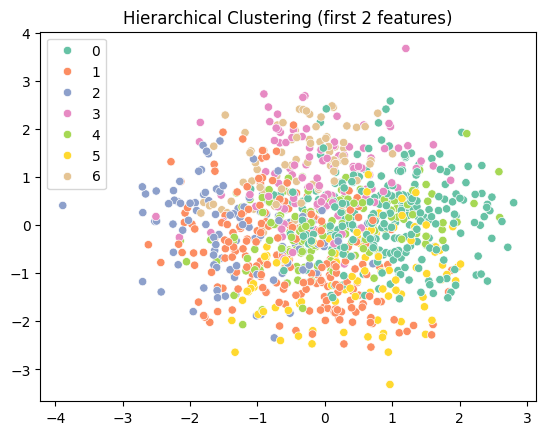

In [25]:
n_clusters = 3


sil = silhouette_score(X_pca, labels)
db = davies_bouldin_score(X_pca, labels)
ch = calinski_harabasz_score(X_pca, labels)

print(f"Hierarchical Clustering Results (n_clusters={n_clusters}):")
print(f"Silhouette Score       : {sil:.3f}")
print(f"Davies-Bouldin Index   : {db:.3f} (lower is better)")
print(f"Calinski-Harabasz Index: {ch:.3f} (higher is better)")


sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=labels, palette="Set2")
plt.title("Hierarchical Clustering (first 2 features)")
plt.show()

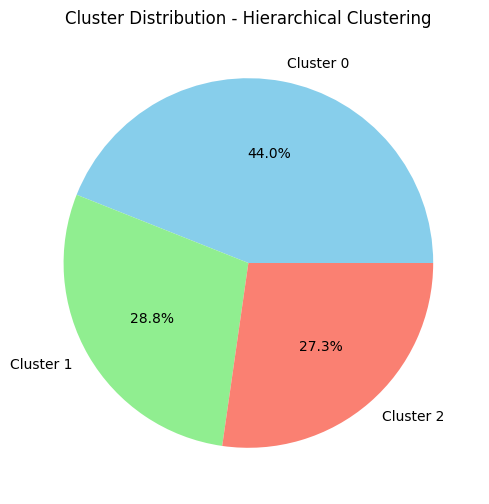

In [26]:
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import pandas as pd

agglo = AgglomerativeClustering(n_clusters=3, linkage="ward")
labels_hier = agglo.fit_predict(df[features])

cluster_counts = pd.Series(labels_hier).value_counts()

plt.figure(figsize=(6,6))
plt.pie(cluster_counts, 
        labels=[f"Cluster {i}" for i in cluster_counts.index],
        autopct="%1.1f%%", 
        colors=["skyblue","lightgreen","salmon"])
plt.title("Cluster Distribution - Hierarchical Clustering")
plt.show()


In [27]:
X_pca_df = pd.DataFrame(X_pca, columns=[f"PC{i+1}" for i in range(X_pca.shape[1])])

agglo = AgglomerativeClustering(n_clusters=best_params[1], linkage=best_params[0])
X_pca_df["Hier_Cluster"] = agglo.fit_predict(X_pca)

print(X_pca_df.head())

        PC1       PC2       PC3       PC4       PC5  Hier_Cluster
0  1.837236 -1.387273  0.970091  0.395513  1.596085             0
1  0.704803 -2.045858 -0.875838  0.552480  0.254117             0
2  0.028909  1.833121  0.417222  0.389891 -2.627913             0
3  1.946212  0.187497 -0.285490  0.378361 -0.005353             0
4 -2.502907  0.708184 -0.715896 -2.075326 -1.529112             0


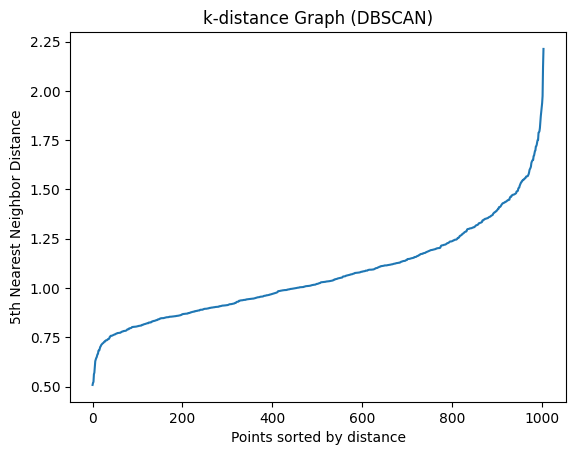

In [28]:
from sklearn.neighbors import NearestNeighbors

neighbors = NearestNeighbors(n_neighbors=6)
neighbors_fit = neighbors.fit(X_pca)
distances, indices = neighbors_fit.kneighbors(X_pca)
distances = np.sort(distances[:, 5])

plt.plot(distances)
plt.title("k-distance Graph (DBSCAN)")
plt.xlabel("Points sorted by distance")
plt.ylabel("5th Nearest Neighbor Distance")
plt.show()

DBSCAN Results (eps=1.5, min_samples=5):
Clusters formed        : 1
Outliers detected      : 8
Silhouette Score       : -1.000
Davies-Bouldin Index   : -1.000 (lower is better)
Calinski-Harabasz Index: -1.000 (higher is better)


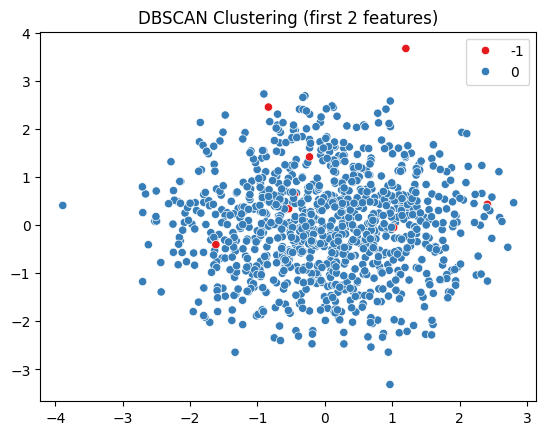

In [29]:
db = DBSCAN(eps=1.5, min_samples=5)   
labels_db = db.fit_predict(X_pca)

clusters_db = len(set(labels_db)) - (1 if -1 in labels_db else 0)
outliers_db = (labels_db == -1).sum()

if clusters_db > 1:  
    sil = silhouette_score(X_pca, labels_db)
    dbi = davies_bouldin_score(X_pca, labels_db)
    ch = calinski_harabasz_score(X_pca, labels_db)
else:
    sil, dbi, ch = -1, -1, -1

print(f"DBSCAN Results (eps=1.5, min_samples=5):")
print(f"Clusters formed        : {clusters_db}")
print(f"Outliers detected      : {outliers_db}")
print(f"Silhouette Score       : {sil:.3f}")
print(f"Davies-Bouldin Index   : {dbi:.3f} (lower is better)")
print(f"Calinski-Harabasz Index: {ch:.3f} (higher is better)")


sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=labels_db, palette="Set1")
plt.title("DBSCAN Clustering (first 2 features)")
plt.show()

In [30]:
import pandas as pd
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

results = []


kmeans = KMeans(n_clusters=3, random_state=42, n_init=20)
labels_kmeans = kmeans.fit_predict(X_pca)
results.append({
    "Algorithm": "KMeans",
    "Silhouette": silhouette_score(X_pca, labels_kmeans),
    "DBI": davies_bouldin_score(X_pca, labels_kmeans),
    "CHI": calinski_harabasz_score(X_pca, labels_kmeans),
    "Clusters": len(set(labels_kmeans)),
    "Outliers": (labels_kmeans == -1).sum(), 
    "Cluster Sizes": dict(pd.Series(labels_kmeans).value_counts().sort_index())
})


agglo = AgglomerativeClustering(n_clusters=3, linkage="ward")
labels_hier = agglo.fit_predict(X_pca)
results.append({
    "Algorithm": "Hierarchical",
    "Silhouette": silhouette_score(X_pca, labels_hier),
    "DBI": davies_bouldin_score(X_pca, labels_hier),
    "CHI": calinski_harabasz_score(X_pca, labels_hier),
    "Clusters": len(set(labels_hier)),
    "Outliers": (labels_hier == -1).sum(), 
    "Cluster Sizes": dict(pd.Series(labels_hier).value_counts().sort_index())
})

db = DBSCAN(eps=1.5, min_samples=5)
labels_db = db.fit_predict(X_pca)

clusters_db = len(set(labels_db)) - (1 if -1 in labels_db else 0)
outliers_db = (labels_db == -1).sum()

if clusters_db > 1:
    sil = silhouette_score(X_pca, labels_db)
    dbi = davies_bouldin_score(X_pca, labels_db)
    chi = calinski_harabasz_score(X_pca, labels_db)
else:
    sil, dbi, chi = -1, -1, -1

results.append({
    "Algorithm": "DBSCAN",
    "Silhouette": sil,
    "DBI": dbi,
    "CHI": chi,
    "Clusters": clusters_db,
    "Outliers": outliers_db,
    "Cluster Sizes": dict(pd.Series(labels_db[labels_db != -1]).value_counts().sort_index())
})


report = pd.DataFrame(results)
print(report)


      Algorithm  Silhouette       DBI         CHI  Clusters  Outliers  \
0        KMeans    0.134562  1.979969  157.945503         3         0   
1  Hierarchical    0.090094  2.271923  111.616751         3         0   
2        DBSCAN   -1.000000 -1.000000   -1.000000         1         8   

              Cluster Sizes  
0  {0: 316, 1: 359, 2: 330}  
1  {0: 568, 1: 259, 2: 178}  
2                  {0: 997}  


In [31]:
import joblib
joblib.dump(kmeans, "kmeans_model.pkl")
joblib.dump(pca, "pca.pkl")
joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']